# Oil and gas example using PANDAS, SQL3, NUMPY and MATPLOTLIB

## Reading the data from excel and into a panda data-frame

In [2]:
import pandas as pd
import numpy as np
import sqlite3

df = pd.read_excel(r'oil-and-gas-summary-production-data-1967-1999.xlsx')
df.head()


,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,1996-03-12 00:00:00,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,1996-12-02 00:00:00,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"


## Cleaning data

Cleaning dates (American style) to a datetime value (yyyy/mm/dd)

In [3]:
import datetime

df['Production Date Entered']
dates = df['Production Date Entered'].tolist()
for i, d in enumerate(dates):
  if type(d) == str:
    month, a, d= d.partition('/')
    day, a, year= d.partition('/')
    dates[i] = datetime.datetime(int(year), int(month), int(day))
    
all(isinstance(d, datetime.datetime) for d in dates)

True

Replacing values in column

In [4]:
df['Production Date Entered'] = dates
df.head()

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,1996-03-12,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,1996-03-29,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,1995-02-14,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,1995-01-19,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,1996-12-02,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"


## Counting number of entries per year


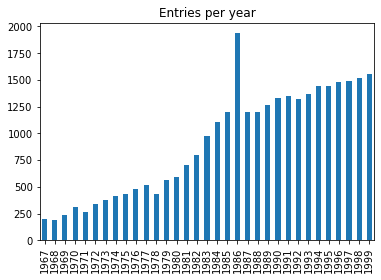

In [5]:
py = pd.value_counts(df['Production Year'])
py.sort_index(ascending=True).plot(kind = 'bar', title='Entries per year')

## Showing the 5 years with the higher number of entries

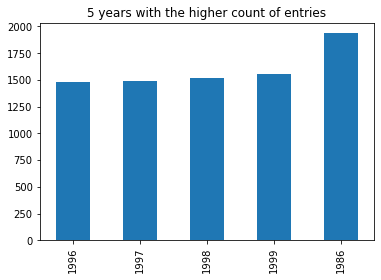

In [6]:
py.sort_values(ascending=True)[-5:].plot(x = 'top 5', y = 'productions per year', kind = 'bar', title='5 years with the higher count of entries')


## Counting number of Active Oil Wells per year

In [7]:
years = np.sort(df['Production Year'].unique())
actOilWells = {}
for y in years:
  prodYear = df['Production Year'] == y
  actOilWells[y] = df[prodYear][['Production Year', 'Active Oil Wells']].sum(axis = 0, skipna = True)[1]
actOilWells

{1967: 4183,
 1968: 4683,
 1969: 5304,
 1970: 5795,
 1971: 4793,
 1972: 5508,
 1973: 5552,
 1974: 5219,
 1975: 4844,
 1976: 5565,
 1977: 4915,
 1978: 5154,
 1979: 5706,
 1980: 5497,
 1981: 5098,
 1982: 4850,
 1983: 4696,
 1984: 4930,
 1985: 4818,
 1986: 4439,
 1987: 4195,
 1988: 4368,
 1989: 4043,
 1990: 3916,
 1991: 3627,
 1992: 3761,
 1993: 3785,
 1994: 3670,
 1995: 3655,
 1996: 3684,
 1997: 3467,
 1998: 3940,
 1999: 3815}

Highest year is 1970


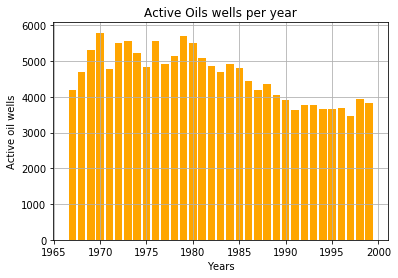

<Figure size 1440x1440 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt


x = [x for x in actOilWells.keys()]
y = [y for y in actOilWells.values()]
highest_year = x[y.index(np.max(y))]
print('Highest year is', highest_year)
plt.bar(x,y, color = 'orange')
plt.title('Active Oils wells per year')
plt.ylabel('Active oil wells')
plt.xlabel('Years')
plt.grid(True)
plt.figure(figsize=(20,20))
plt.show()

## Operators with the highest Oil Production

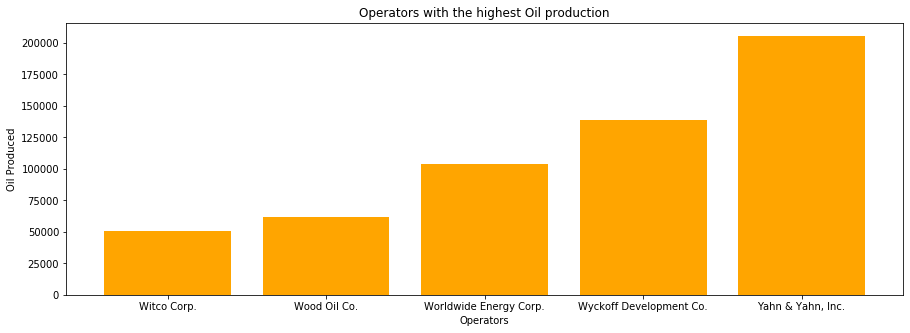

In [9]:
# Operators with the highest Oil production 

a = df[df['Production Year'] == highest_year][['Operator', 'Oil Produced, bbl']].values
a.sort(axis=0)
a = a[-6:,:]
x = a[:,0]
y = a[:,1]
plt.figure(figsize=(15,5))
plt.title('Operators with the highest Oil production')
plt.ylabel('Oil Produced')
plt.xlabel('Operators')
plt.bar(x,y, color='orange')
plt.show()

## Gas production per year

In [0]:
a = df[['Production Year', 'Production Date Entered', 'Gas Produced, Mcf']].values
years = np.unique(a[:,0])
# find they year with the highest count of gas produced
summation = np.zeros((years.shape[0], 2), dtype=int)
for i, y in enumerate(years):
  summation[i] = [y, np.sum(np.where(a[:,0] == y)[0]),]


Year with highest gas Production :  1993


<BarContainer object of 33 artists>

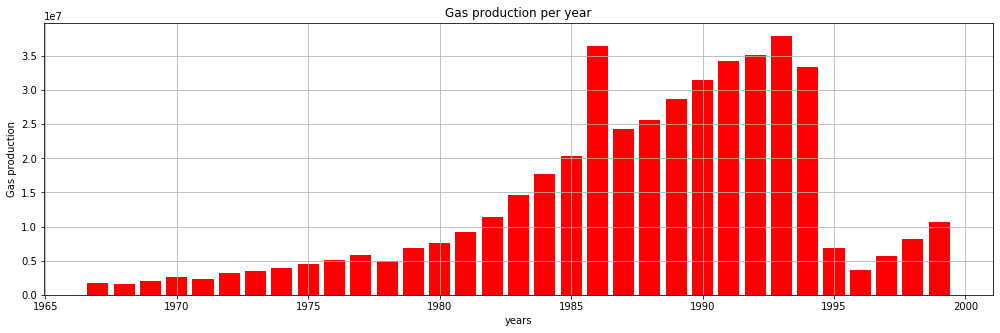

In [11]:
yearHighestGasProd = summation[np.argmax(summation[:,1])][0]
print('Year with highest gas Production : ', yearHighestGasProd)
summation
plt.figure(figsize=(17,5))
plt.title('Gas production per year')
plt.xlabel('years')
plt.ylabel('Gas production')
plt.grid(True)
plt.bar(summation[:,0], summation[:,1], color='red')

## Year with the highest gas production, divided by months

In [12]:
a = df[['Production Year', 'Production Date Entered', 'Gas Produced, Mcf']].values
indexes = np.where(a[:,0] == yearHighestGasProd)
gas_date = a[indexes][:,1:]
gas_month = [[m.month, gas] for m, gas in zip(gas_date[:,0], gas_date[:,1])]
gas_month = np.asarray(gas_month)
print(gas_month.shape)
gas_month

(1372, 2)


array([[   1,  565],
       [   2,   79],
       [   8,    0],
       ...,
       [   8,    0],
       [   3,  469],
       [   3, 2157]])

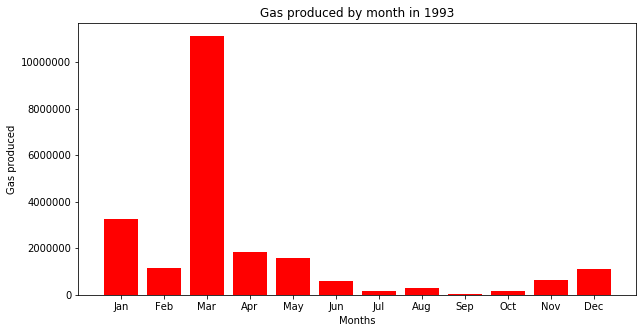

In [13]:
import calendar
summation = np.zeros((12,2), dtype=int)
months = [v for v in calendar.month_abbr][1:]

for i in range(12):
  indexes = np.where(gas_month[:,0] == i+1)
  summation[i] = [i+1, np.sum(gas_month[indexes])]

plt.figure(figsize=(10,5))
plt.title("Gas produced by month in %d" %yearHighestGasProd )
plt.xlabel('Months')
plt.ylabel('Gas produced')
plt.ticklabel_format(style='plain')
plt.bar(months, summation[:,1], color='red')
plt.show()

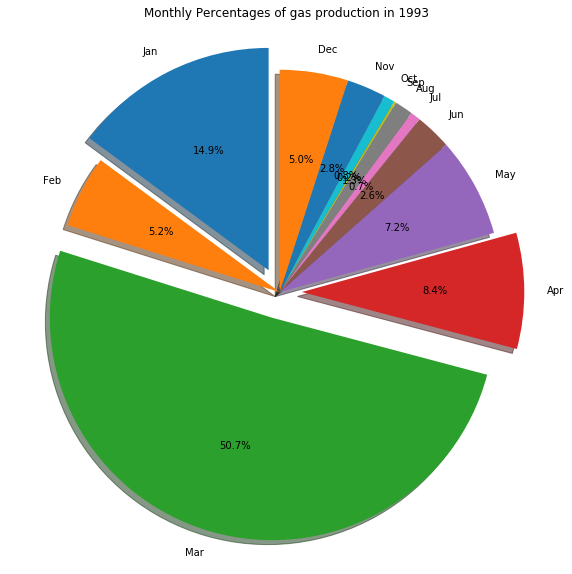

In [14]:
explode = [0]*12
explode[0] = 0.11
explode[2] = 0.12
explode[3] = 0.1
plt.figure(figsize=(10,10))
plt.title('Monthly Percentages of gas production in %d' %yearHighestGasProd)
plt.pie(summation[:,1], explode = explode, shadow=True, startangle = 90, labels=months, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Taxable Gas for all years

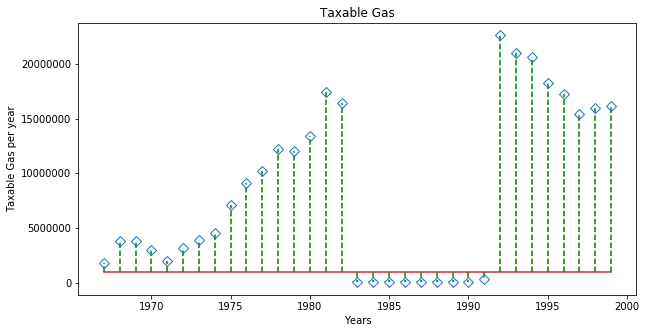

Year with the highest Taxable gas is : 1992


In [15]:
taxable_gas = df[['Production Year', 'Taxable Gas, Mcf']].values

summation = []
for y in years:
  indexes = np.where(taxable_gas[:,0] == y)[0]
  summation.append([y, np.sum(taxable_gas[indexes][:,1])])

summation = np.asarray(summation)

plt.figure(figsize=(10,5))
plt.title("Taxable Gas" %yearHighestGasProd )
plt.xlabel('Years')
plt.ylabel('Taxable Gas per year')
plt.ticklabel_format(style='plain')
markerline, stemlines, baseline =  plt.stem(summation[:,0], summation[:,1], linefmt='--g', markerfmt='D', bottom = 1000000, use_line_collection=True)
markerline.set_markerfacecolor('none')
markerline.set_markersize(7)
plt.show()

highestYearTaxGas = summation[np.argmax(summation[:,1])][0]
print('Year with the highest Taxable gas is : %d' %highestYearTaxGas)


## Taxable gas by county for the with the highest ammount of taxable gas


<Figure size 432x288 with 0 Axes>

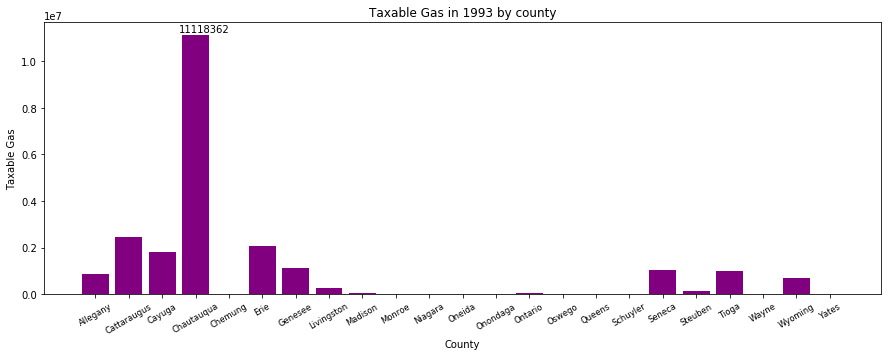

In [16]:
taxable_gas = df[['Production Year', 'County', 'Taxable Gas, Mcf']].values

indexes = np.where(taxable_gas == highestYearTaxGas)[0]
county = taxable_gas[indexes][:,1:]
counties = np.unique(county[:,0])
summation = []

for c in counties:
  indexes = np.where(county[:,0] == c)[0]
  summation.append([c, np.sum(county[indexes][:,1])])
summation = np.asarray(summation)

plt.clf()
plt.figure(figsize=(15,5))
plotbar = plt.bar(counties, summation[:,1].astype(int), color='purple')
plt.title("Taxable Gas in %d by county" %yearHighestGasProd )
plt.xticks(rotation=30, size='small')
plt.xlabel('County')
plt.ylabel('Taxable Gas')
xlocs, xlabs = plt.xticks()
plt.text(xlocs[3]-0.5, summation[:,1][3].astype(int) + 150000, summation[:,1][3].astype(int) )
plt.show()